# Class 的定义

## Define a class

Use `class` to define a new class.  
    * Capitalize the first letter  
    * no ()

In [2]:
class Money:
    pass

Create a object 

In [7]:
print(Money)
print(Money.__name__)
a = Money()
print(a)


<class '__main__.Money'>
Money


The number after at is the location in ram

What happens when claiming a class: 

当我们创建一个class的时候，比如Money内存中会创建一个空间用来存储这个类的信息，包括.__name__之类。并且同时创建一个变量Money指向这个类。之后我们通过此类创建对象时，比如Dollar。就会在内存中开辟一块空间然后把Dollar的变量空间指向跟Money这个类结构相同的空间，然后赋值属性。
推荐使用Process On 进行流程图的设计[here](https://www.processon.io/diagrams)



In [4]:
print(a.__class__)

<class '__main__.Money'>


## Attribute & Method

### Attribute

Attribute can only be access by an object.  
Difference between variables:  
* Variables are values that can be changed, permit: Global or loacl  
* Attributes are charateristics belongs to an object, permi: public or private by `.attribute` 
How to distinguish between attributes and variables  
By considering does it belong to an object or not?

They can be classified by their host:  
* 对象属性（instance attributes）是指属于类的实例（对象）的特定属性。每个对象可以有不同的对象属性值。这些属性在创建对象时赋值，并且每个对象都可以拥有不同的属性值。  

* 类属性（class attributes）是属于类本身的属性，而不是类的实例。它们在整个类中是共享的，对于该类的所有实例都是相同的。类属性通常在类的定义中声明，并在所有实例之间共享相同的值。  
  
 

#### Attribute operations for a single object


In [8]:
class Person:
    pass

***To add or change an attribute to an object***  
* Use `.__dict__` to list all the attributes  
* When you change the attribute you can change the data structure, this is because python will get a new place in ram and the attribute will point to another place.  
* There is some difference between accessing and changing  
* The attribute only belong to a single object
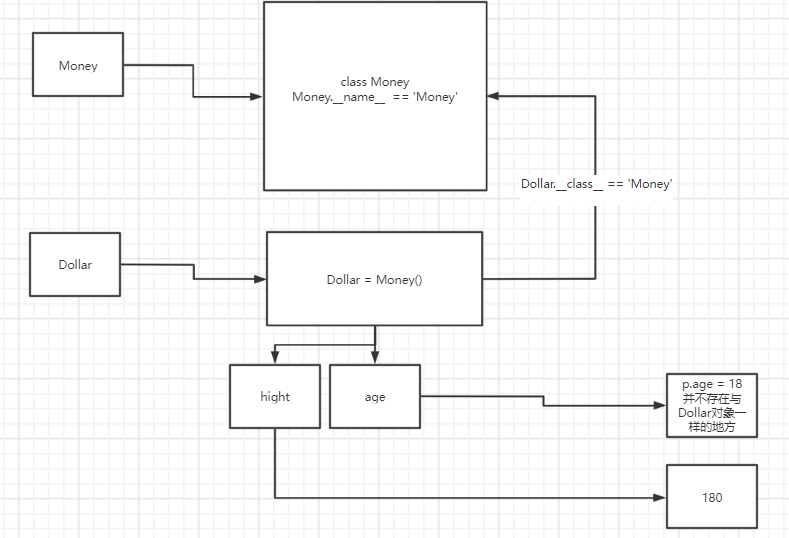

In [19]:
p = Person()
p.age = 18
p.height = 180
# Check all the attribute:
print(p.__dict__)
p.height = 190
print(p.__dict__)

{'age': 18, 'height': 180}
{'age': 18, 'height': 190}


***To access an attribute***  
You cannot access the attributes belong to another object

In [16]:
print(p.hight)
# What happens if there is no attribute in a class
p.gender

180


AttributeError: 'Person' object has no attribute 'gender'

Note: we can also get the attributes by self

***To delete an attribute***  
Just the same with variables, we can delete the attribute by `del`  


In [23]:
num1 = num2 = 10
del num2
print(num1)
print(num2)
# if ‘10’ were not be referenced, then it would be delete either

10


NameError: name 'num2' is not defined

In [21]:
p.gender = "male"
print(p.gender)
del p.gender
print(p.gender)

male


AttributeError: 'Person' object has no attribute 'gender'

#### Attribute operations for class

In [24]:
class Money:
    pass

***Every in python is an object***  
Class is also an object

In [25]:
Money.count = 1
Money.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Money' objects>,
              '__weakref__': <attribute '__weakref__' of 'Money' objects>,
              '__doc__': None,
              'count': 1})

In [27]:
One = Money()
print(One.count)
One.count = 2
print(One.count)
print(Money.count)

1
2
1


***Comparison between class and object by class***


In [7]:
class Person:
    age = 10
    num = 19

Person.age = 20
Person.gender = "male"
del Person.num
Person.__dict__

p = Person()
p.num = 10
print(p.age)
p.gender = 'female'
print(p.gender)
del p.gender
p.__dict__
# Below it will error
# It will firstly check the specific object
# If in specific object has the attribute then use it, if not it will go to the class to see default value. 
q = Person()
print(q.gender)
del q.gender 

20
female
male


AttributeError: gender

***\_\_slots\_\_*** 如何限制可以添加的属性  

Generally, for other languages, the object only can have the same attributes with class, but for python, object itself can add unique attributes.  
Sometimes, this means you can add some unwanted attributes for a specific object without consciousness.  
Inorder to constrain the stuff, you need to use `__slots__` to define the attributes you can add.  

In [8]:
class Person:
    __slots__ = ['age']
    pass

p1 = Person()
p1.age = 9
# This is an error, because you cannot add an attribute that is not in the list of __slots__
p1.gender = "male"

AttributeError: 'Person' object has no attribute 'gender'

### Method 

***Def***: 描述一个目标的行为动作
与函数类似：封装了行为动作
主要区别：调用方式

In [11]:
def eat():
    print('yamiyami')
eat()

yamiyami


In [12]:
class Person:
    def eat2(self):
        # What is the 'self' Will explain later
        print('yamiyami')
p = Person()
p.eat2()


yamiyami


***Classification of Method***  
Criteria for classification  
* 实例方法（Instance Method） self 
* 类方法（Class Method） class
* 静态方法（Static Method） NaN

The criteria of classification: `The first parameter it receives`:

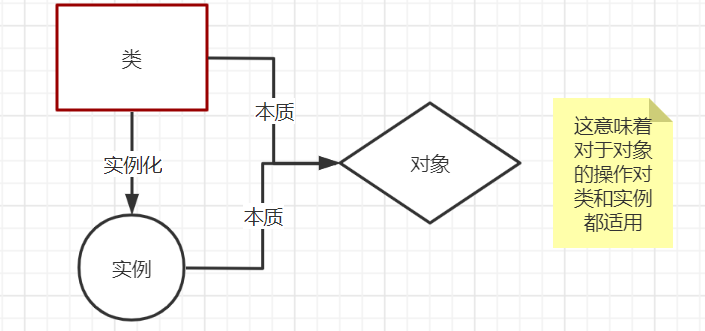  

In [ ]:
locals()

***How to define different methods***

In [5]:
class Person:
    # example method
    def eat_object(self):
        print('yamiyami',self)
    @classmethod 
    # This is a decorator and you need this to define a class method
    def eat_class(cls):
        print('This is a class methoed',cls)
    @staticmethod
    def eat_static():
        print('This is a static method')

p = Person()

Standard Application
Object method can be applied by an object.
Class method can be applied by object, class itself, and its decendents. 


***How to store those method***

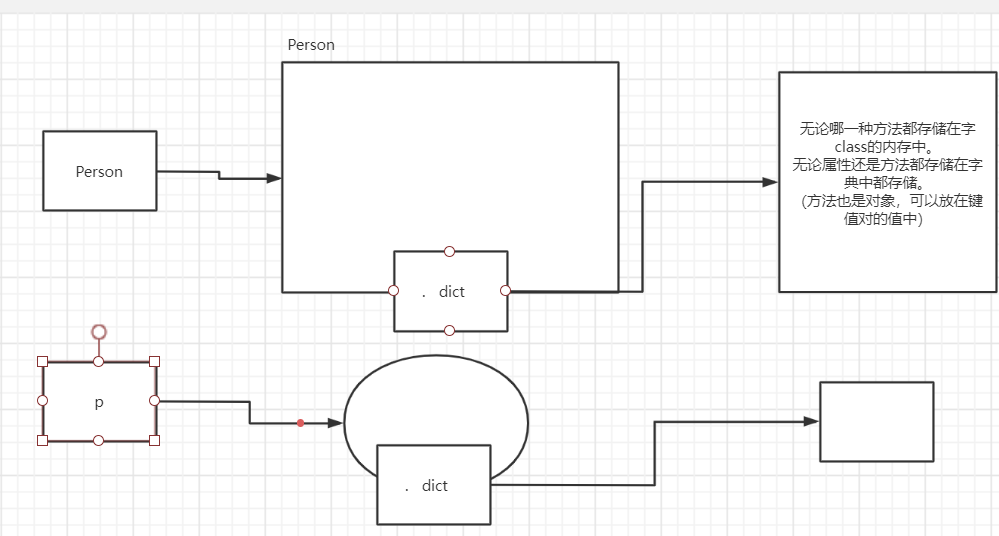

In [10]:
# 验证

p = Person()

p.age = 18
def run():
    print('I am running')

p.run = run
p.run()

print(p.age, p.run)

I am running
18 <function run at 0x000001AD24657010>


***How to call those functions***

Standard method


In [20]:
# object method:
p = Person()
p.eat_object()

# class method: 
# Can be called by object, class, subclass
Person.eat_class()
p.eat_class()
class A(Person):
    pass
A.eat_class()

# static method:
p.eat_static()
Person.eat_static()


yamiyami <__main__.Person object at 0x000001AD22C69360>
This is a class methoed <class '__main__.Person'>
This is a class methoed <class '__main__.Person'>
This is a class methoed <class '__main__.A'>
This is a static method
This is a static method


Non standard method: To find the funcion itself and call it directly.

In [19]:
# object method:
print(Person.eat_class)
Person.eat_object(123)

# Class method:
func = Person.eat_class # 此时class已经被传进去了
func()




<bound method Person.eat_class of <class '__main__.Person'>>
yamiyami 123
This is a class methoed <class '__main__.Person'>


***Method & attributes authority***

In [16]:
class Person:
    age = 18
    def instance_method(self):
        print(self.age)
        print(self.num)
    @classmethod
    def class_method(cls):
        print(cls.age)
    @staticmethod
    def staticmethod():
        print(Person.age)
p = Person()
# Attributes are distinguished by its stortage
print('This is a instance method')
p.num = 10
p.instance_method()
Person.staticmethod()

# class attribute: Both instance and class
print('This is a class method')
print(Person.age)
print(p.age)
Person.class_method()
# Instance attribute: only instance
print(p.age)


This is a instance method
18
10
18
This is a class method
18
18
18
18


`Instance attribute` can only accessed by instance itself.  
`Class attribute` can accessed by instance and class.   
`Instance method` can accesss instance attribute and class attributes.  
`Class method` can access class attributes only.




***Original Class***  
Def:The class that creates a class


In [5]:
number = 10
print(number.__class__)

a = 'abc'
print(a.__class__)

class Person:
    pass

p = Person()
print(p.__class__)
# Who created the 'class'
print(Person.__class__)
print(str.__class__)
print(int.__class__)
print('Who created the type')
print(type.__class__)

<class 'int'>
<class 'str'>
<class '__main__.Person'>
<class 'type'>
<class 'type'>
<class 'type'>
Who created the type
<class 'type'>


### Summary of class

***Advantages***
1. We can minimize the number of variables sent to function manually by using instance methods.  



***Summarization***  

1. Syntax of class  
2. How to build different method  
3. How to call different methods  
4. How to design  



### How to wirte a class  


#### `Type()`

Use `type()` to create a class. The structure is just like a `dict`. We can add `key` & `value` pair to create attributes and methods.

In [10]:
# We can use type to create a class
# We create a space for the Dog class, we need a pointer to access the class
@classmethod
def run(cls): # becareful we need to put self in the instance method
    print("Running",cls)

xxx = type('Dog',(),{'count':0,'run': run}) # in the brackets we can send into the parent class
print(xxx)

d = xxx()
d.run()

<class '__main__.Dog'>
Running <class '__main__.Dog'>


#### Searching mechanism for metaclass



When creating a class, it will search its metaclass first, if not, it will check parent class, if not it will create the class from `type`. The heirarchy is just like the argument searching.

In [14]:
# '__metaclass__' in body

# __metaclass__ = xxx Count for all blocks

class Person:
    __metaclass__ = type # Only count for this block of code
    pass
# metaclass in argument list
class Person(metaclass = type):
    pass
# there is parent class
class Animal:
    pass
class Person(Animal):
    pass
    

### Supplementary Information

#### Write the Description with `help()`
def run(self, distancce, step):  
    '''  
    The description of the function  
    :param distance: the meaning, the type, default value  
    :param step:  
    :return: type, class, default value  
    '''

In [21]:
def run(self, distance, step):
    '''  
    The description of the function:
    Attributes:
        :param distance: the meaning, the type, default value  
        :param step:  
    Methods:
    :return type, class, default value  
    '''
    pass

help(run)
# This function will generate a description text of the function

Help on function run in module __main__:

run(self, distance, step)
    The description of the function:
    Attributes:
        :param distance: the meaning, the type, default value  
        :param step:  
    Methods:
    :return type, class, default value



#### Create a project file with module `pydoc` 

In the finish point of the project, you need to send a project file to your customer. In the file you will need to include the definitions of functions and descriptions of the functions, the specific realization will not be included.

In [20]:
class Person:
    '''
    This is a description of the Person class.
    Attributes:
        :name: The name of the......
    Methods:
        :run():   
    '''

    name = 1
    def run(self, kcal):
        '''
        This is a description of the function 
        Attributes:

        '''
        pass

help(Person)

Help on class Person in module __main__:

class Person(builtins.object)
 |  This is a description of the Person class.
 |  Attributes:
 |      :name: The name of the......
 |  Methods:
 |      :run():
 |  
 |  Methods defined here:
 |  
 |  run(self, kcal)
 |      This is a description of the function 
 |      Attributes:
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  name = 1



***Create python document with pydoc***
Steps: in `cmd`
1. python3 -m pydoc Check the description of the document
2. python3 -m pydoc -p 6666 /-b  Open local server and read the documentation
3. python3 -m pydoc -w `name of your module` Generate the description o your module

You can apply the searching mechanism in different stages of heiracy to do something special.

### Attributes: private, read-only, inner 

#### Public, Protected, Private attributes

Can only be accessed in the class, you cannot change the attribute outside the class  
Actually, in python there is no private attribute, everything is public, we can only realise the functionality by adding `_`.  This is not really private, because you can access the variable by some special methods.

* `_` is protected  1,2,3
* `__` is private  1
1. In class
2. In subclasses
3. Other parts in the same module
4. Access accross modules(or other files)



In [34]:
class Animal:
    # In class
    public_varible = 1
    _protected_varible = 2
    __private_varible = 3
    def acc_public(self):
        print('In class, public variable ', self.public_varible)
    def acc_protected(self):
        print('In class, protected variable ', self._protected_varible)
    def acc_private(self):
        print('In class, private variable ', self.__private_varible)    
    pass

class Dog(Animal):
    # In subclass
    def sub_acc_public(self):
        print('In Subclass, public variable ', self.public_varible)
    def sub_acc_protected(self):
        print('In Subclass, protected variable ', self._protected_varible) 
    def sub_acc_private(self):
        print('In Subclass, private variable ', self.__private_varible) 
    pass

# Other parts in the same module

a = Animal()
d = Dog()
# In class public variable
a.acc_public()
a.acc_protected()
a.acc_private()

# 'In Subclass, public variable '
d.sub_acc_public()
d.sub_acc_protected()
    # Cannot
# d.sub_acc_private()

# Other spaces
print('Other spaces in the same module,public')
print(Animal.public_varible)
print(Dog.public_varible)

print('Other spaces in the same module,protect')
print(Animal._protected_varible)
print(Dog._protected_varible)

print('Other spaces in the same module,private')
# Both cannot
# print(Animal.__private_varible)
# print(Dog.__private_varible)


# Other modules cannot access protected and private variables.

In class, public variable  1
In class, protected variable  2
In class, private variable  3
In Subclass, public variable  1
In Subclass, protected variable  2
Other spaces in the same module,public
1
1
Other spaces in the same module,protect
2
2
Other spaces in the same module,private


AttributeError: type object 'Animal' has no attribute '__private_varible'

#### Name reforme mechanism in python

The interpreter will change the varible name of `__variable` to `_[class name]_variable`

In [37]:
print(Animal.__dict__)
print(Dog.__dict__)
print(Animal._Animal__private_varible)

{'__module__': '__main__', 'public_varible': 1, '_protected_varible': 2, '_Animal__private_varible': 3, 'acc_public': <function Animal.acc_public at 0x000002154E846170>, 'acc_protected': <function Animal.acc_protected at 0x000002154E847A30>, 'acc_private': <function Animal.acc_private at 0x000002154E845F30>, '__dict__': <attribute '__dict__' of 'Animal' objects>, '__weakref__': <attribute '__weakref__' of 'Animal' objects>, '__doc__': None}
{'__module__': '__main__', 'sub_acc_public': <function Dog.sub_acc_public at 0x000002154E845A20>, 'sub_acc_protected': <function Dog.sub_acc_protected at 0x000002154E8464D0>, 'sub_acc_private': <function Dog.sub_acc_private at 0x000002154E846F80>, '__doc__': None}
3


#### Application of different attributes

* Data protect
* Data filter


当我每个instance 都有同一个属性但是具有不同的值，我需要对不同的实例初始化不同的值.  
`__init__()` When we created an instance, it will be called automatically. 

***Data protection***  
  * Can only be created inside the class
  * We can use a method to change the private variable

In [6]:
class Person:
    def __init__(self):
        self.__age = 18
    def setAge(self, value):
        # To make sure the value is resonable
        if isinstance(value, int) and 0< value < 200:
            self.__age = value
        else:
            print('There is a problem with your value')
        self.__age = value
    def getAge(self):
        return self.__age
    pass

p1 = Person()
p1.__age = -10
print(p1.__dict__)

p1.setAge(20)

{'_Person__age': 18, '__age': -10}


***Other formats***  
* `__xx__` This is a build-in format
* `xx_` This is a format to distinguish build-in format and your variables

#### Read only

* It is always connected with a hardware, such as a sensor which can detect something. It is resonable to not change the value.  
* You cannot call a variable if the variable is a private one.  
* The read only variable can be realised by a method.  
  * `getAge(): return self.__age`
  * `@property` Relate the method of operating attributes to an attribute
    * It is a class


In [8]:
class Person:
    def __init__(self):
        self.__age = 18
    @property # you can call this function just like a attribute
    def getAge(self):
        return self.__age
    pass


p1 = Person()
print(p1.getAge)
property

18


##### `Property`

***Supplementary  information***  
* Classic class: do not inherit from `object`
* New class: inherit from `object`
python3 will default to inherit from `object`, while python2 does not


In [9]:
# Check the base class
class Person: # class Person(object)
    pass
print(Person.__base__)

<class 'object'>


***`Property` in new class & classic class***


In new class

In [1]:
# The first way to use
class Person(object):
    def __init__(self):
        self.__age = 18
    def get_age(self):
        return self.__age
    def set_age(self, value):
        self.__age = value

    age = property(get_age, set_age)
p = Person()
print(p.age)
p.age = 98
print(p.__dict__)

# The second way
class Person(object):
    def __init__(self):
        self.__age = 18
    @property
    def age(self):
        return self.__age
    @age.setter
    def age(self, value):
        print("-set-")
        self.__age = value

p = Person()
print(p.age)
p.age = 98
print(p.__dict__)

18
{'_Person__age': 98}
18
-set-
{'_Person__age': 98}


In classic class: omited need Python2


***Read only method 2***

In [1]:
from typing import Any


class Person:
    # We need a imbeded method to 
    # The method will be called,
    # when we use <Instance name>.<attribute> to create or change the value
    # The attribute will only be changed inside the method
    def __setattr__(self, __name: str, __value: Any) -> None:
        print(__name, __value)
        # 1. 判断是不是可读属性
        # if __name == 'age':# 这样我们没办法创建只读属性只能访问
        if __name == 'age' and 'age' in self.__dict__.keys():    
            print('This attribute is only readable, no change permitted')
        # 2. 如果不是只读属性，就加入或者修改
        else:
            # 这里会形成一个死循环，因为每创建一个attribute就会调用这个代码，if not readable，GG
            # self.__name = __value #这样写就是一个死循环，gg了
            # 我们需要使用直接给字典添加键值对的方式
            self.__dict__[__name] = __value
    pass
p1 = Person()
p1.age = 18
# No attributes are added
print(p1.__dict__)

p1.name = 'lol'
print(p1.__dict__)



age 18
This attribute is only readable, no change permitted
{}
name lol
{'name': 'lol'}


#### Common imbeded attributes

***Class attributes***  
* `__dict__`: key-value dictionary of a class
* `__bases__`: The tuple composed of all the parents class
*  `__doc__`: The string of the document of the class
*  `__name__`: Name of the class
*  `__module__`: The module that the class located  
***Instance attributes***  
* `__dict__`: key-value dictionary of a class
* `__class__`: name of the belonged class

In [7]:
class Person:
    '''This is a class describes a person'''
    age = 19
    def __init__(self) -> None:
        '''This is a imbeded function'''
        self.name = 'lol'
    def run(self):
        '''Running of a man'''
        print('run')

print(Person.__base__)
print(Person.__doc__)# Only the description of the class is printed
print(Person.__module__) 

p = Person()
print(p.__class__)
print(p.__dict__)    

<class 'object'>
This is a class describes a person
__main__
<class '__main__.Person'>
{'name': 'lol'}


### Private & imbeded Method